#**HW 3: Convolutional Neural Networks**

In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the Fashion Minst dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [17]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: Fashion MNIST dataset

We will use the Fashion MNIST dataset, a dataset of Zalando's articles. Each sample is a 28x28 pixels grayscale image, associated with a label from 10 classes:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Each pixel intensity is represented by a uint8 (byte) from 0 to 255.
We will divide the dataset in training, validation and test set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of the deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one). Therefore we use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims) to transform each image from a matrix to a 3-dimensional tensor. Finaly we have to normalize the input data.

In [18]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = (
    fashion_mnist.load_data()) #The dataset is already divede in test and training..

#We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


Let's take a look at a sample of the images in the dataset:

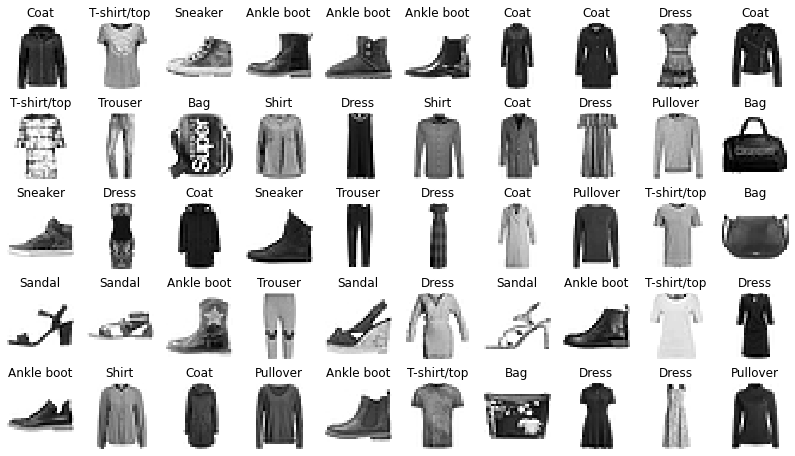

In [19]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols*1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.show()

### [TO COMPLETE] Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. Try to standardize the pixel values.

In [20]:
#[TO COMPLETE]: define X_train_scaled, X_valid_scaled and X_test_scaled, the sets that contains 
#Hint: For each feature (pixel intensity), you must subtract the mean() of that 
#feature (across all instances, so use axis=0) and divide by its standard 
#deviation (std(), again axis=0)

mean_X_train = np.mean(X_train,axis=0)

std_X_train = np.std(X_train,axis=0)

X_train_scaled = (X_train - mean_X_train) / std_X_train  #[TO COMPLETE]
X_valid_scaled = (X_valid - mean_X_train) / std_X_train  #[TO COMPLETE]
X_test_scaled = (X_test - mean_X_train) / std_X_train    #[TO COMPLETE]

#Add one dimension to manage the channel
X_train_scaled=tf.expand_dims(X_train_scaled, 3) 
X_valid_scaled=tf.expand_dims(X_valid_scaled, 3) 
X_test_scaled=tf.expand_dims(X_test_scaled,3)

#Make sure you compute the means and standard deviations on the training set,
#and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [21]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='sgd',
              metrics=["accuracy"])


Print the model summary

In [22]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                62730     
Total params: 63,050
Trainable params: 63,050
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [23]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
430/430 [==============================] - 25s 56ms/step - loss: 1.0626 - accuracy: 0.6725 - val_loss: 0.5197 - val_accuracy: 0.8242
Epoch 2/10
430/430 [==============================] - 24s 56ms/step - loss: 0.4925 - accuracy: 0.8281 - val_loss: 0.4471 - val_accuracy: 0.8514
Epoch 3/10
430/430 [==============================] - 24s 56ms/step - loss: 0.4346 - accuracy: 0.8485 - val_loss: 0.4088 - val_accuracy: 0.8640
Epoch 4/10
430/430 [==============================] - 24s 56ms/step - loss: 0.4010 - accuracy: 0.8621 - val_loss: 0.3918 - val_accuracy: 0.8692
Epoch 5/10
430/430 [==============================] - 24s 56ms/step - loss: 0.3740 - accuracy: 0.8689 - val_loss: 0.3771 - val_accuracy: 0.8714
Epoch 6/10
430/430 [==============================] - 24s 56ms/step - loss: 0.3615 - accuracy: 0.8741 - val_loss: 0.3635 - val_accuracy: 0.8758
Epoch 7/10
430/430 [==============================] - 24s 56ms/step - loss: 0.3467 - accuracy: 0.8790 - val_loss: 0.3604 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 2s - loss: 0.3549 - accuracy: 0.8759
accuracy: 87.59%


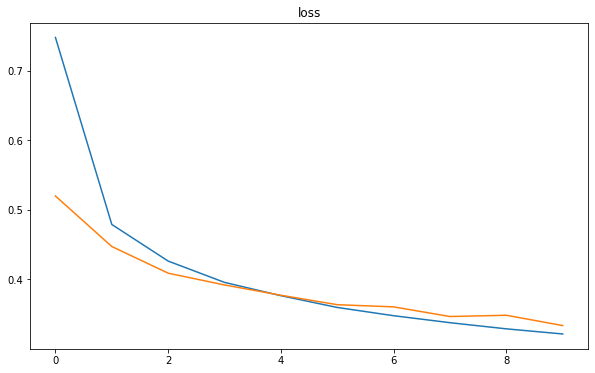

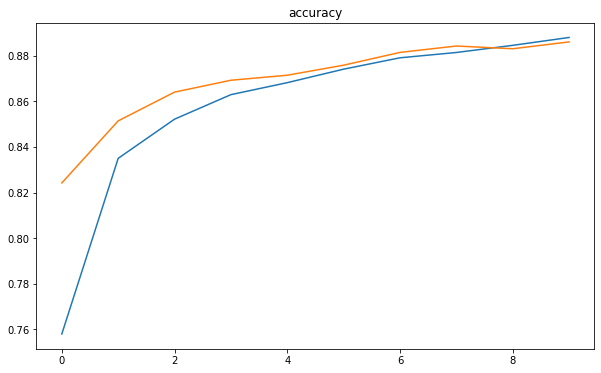

In [24]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.title('loss')

def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'])
  plt.plot(history.epoch,history.history['val_accuracy'])
  plt.title('accuracy')

plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

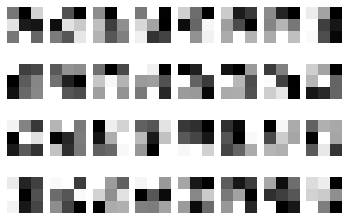

In [25]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### [TO COMPLETE] Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [26]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer="sgd",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 12, 12, 16)        2064      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5770      
Total params: 8,154
Trainable params: 8,154
Non-trainable params: 0
____________________________________________________

[TO COMPLETE] Explain in this cell: 

1.   how the number of parameters on each of the two Conv2D layers is determined;
2.   the reasons why the two considered convolutional layers have a different number of parameters.

Answers:


1.   [TO COMPLETE] Answer to question 1

First layer: The layer has just 1 feature map as input (the original inputof the model). This layer has 32 3x3 output filters plus the bias, and each of them has a total of 3x3x1+1 = 10 parameters. Since there are 32, (3x3x1+1)*32 = 320. So this layer has 320 parameters.

Second layer: The previous layer has 32 filters, so the input has 32 feature maps now. Since the layer has 16 2x2 filters for each feature map of the input and there is a bias for each filter, (2x2x32+1)*16 = 2064.

2.   [TO COMPLETE] Answer to question 2

The reason why these two layers have a different number of parameters is because the size and number of the kernels or filters and the number of feature maps (channels) of the input is different.

Let's now train our deep CNN.

Epoch 1/10
430/430 [==============================] - 28s 63ms/step - loss: 1.4947 - accuracy: 0.5104 - val_loss: 0.6790 - val_accuracy: 0.7604
Epoch 2/10
430/430 [==============================] - 27s 63ms/step - loss: 0.6590 - accuracy: 0.7673 - val_loss: 0.5631 - val_accuracy: 0.8018
Epoch 3/10
430/430 [==============================] - 27s 63ms/step - loss: 0.5617 - accuracy: 0.7986 - val_loss: 0.5074 - val_accuracy: 0.8264
Epoch 4/10
430/430 [==============================] - 27s 62ms/step - loss: 0.5017 - accuracy: 0.8226 - val_loss: 0.4688 - val_accuracy: 0.8408
Epoch 5/10
430/430 [==============================] - 27s 63ms/step - loss: 0.4696 - accuracy: 0.8331 - val_loss: 0.4471 - val_accuracy: 0.8512
Epoch 6/10
430/430 [==============================] - 27s 62ms/step - loss: 0.4469 - accuracy: 0.8436 - val_loss: 0.4313 - val_accuracy: 0.8524
Epoch 7/10
430/430 [==============================] - 27s 62ms/step - loss: 0.4334 - accuracy: 0.8473 - val_loss: 0.4235 - val_accuracy:

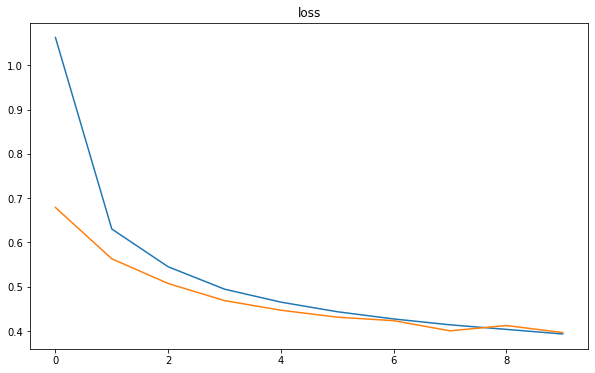

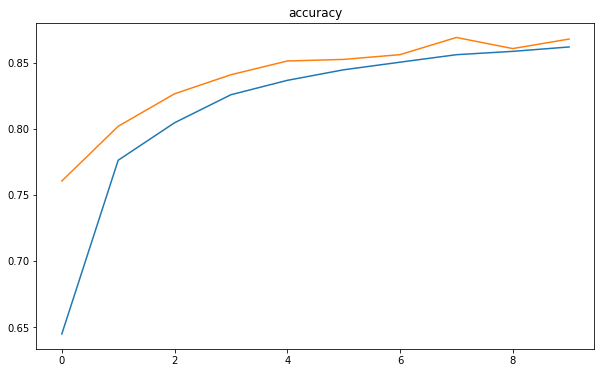

In [27]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid_scaled, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## [TO COMPLETE] Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

**[TO COMPLETE]**: Your task is to modify some of the hyper-parameters of the previous exercise's network and compare the results. At least one of the models you try should have an improvement in the test set results (generalization) over the result of the model used in the previous exercise.
In the cell below report only the code of the **best model** that you can find. In addtion, print out its result on the test set, and plot the accuracy and the loss trends in the notebook you return.
Moreover, for each setup you test, analyze and discuss the obtained results briefly in the last cells at the bottom.

Hint: Each reparameterization should change a different aspect in the network, while the rest of the parameters would stay the same. 
Example parameters to try to change (we suggest to test at least one re-parametrization for each of these categories):

*    number of layers or neurons or filters dimension
*   activation functions
*   epochs
*   batch sizes
*   optimizer, see TensorFlow documentation on [optimizers](https://https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
*   max-pooling on/off on certain layers, or pool size

For what concerns the optimizer, as you can see in the 'compile' method [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) is it possible to pass as 'optimizer ' attribute's value a string (the name of optimizer) or an optimizer instance.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. Don't do it unless you have a good plan.

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 12, 12, 32)        18464     
_________________________________________________________________
flatten_12 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                46090     
Total params: 65,194
Trainable params: 65,194
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/7
860/860 [==============================] - 71s 83ms/step - loss: 0.5716 - accuracy: 0.7984 - val_los

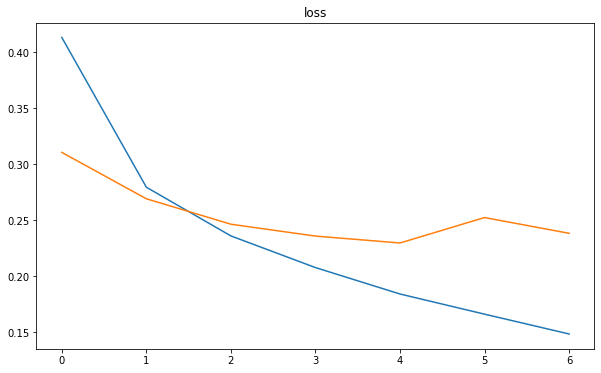

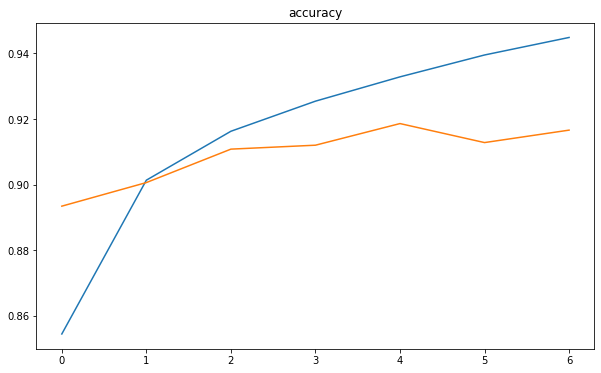

In [31]:
#[TO COMPLETE]
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding = 'same',activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])
  
print(model.summary())

history = model.fit(X_train_scaled, y_train, epochs=7, batch_size=64,
                  validation_data=(X_valid_scaled, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test_scaled, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### [TO COMPLETE] Example of tests discussion
The best model that I found ...[TO COMPLETE]
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding = 'same',activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

model.compile(loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"])

history = model.fit(X_train_scaled, y_train, epochs=7, batch_size=64,
                  validation_data=(X_valid_scaled, y_valid))

The achieved accuracy in the test set is ...[TO COMPLETE]

accuracy: 91.40%

Discussion:
[TO COMPLETE]

I found that adding the Adam optimizer (with lr=0.001) seems to give the best performance for this model. I also doubled the filters on each convolutional layer and augmented the size of the kernel in the second one. Also, I downsized the batch size to 64. I left the epochs at 10, both for computing time sake and to avoid overfitting. Removing the second pooling layer also brought an improvement on the model's performance. When I added a third convolutional layer the performance got worse.
Then I tried with 7 epochs and achieved a similar result that with 10.

Besides, I tested also other models: 
* [TO COMPLETE]

I tried: 
- different optimizers, but I obtained the best result with Adam. Learning rate varied between 0.01 and 0.001.
- adding a convolutional layer
- changing the size of the kernels
- changing the activation function to sigmoid and tanh (didn't work well)
- adding a pooling layer 
- deleting a pooling layer, 
- changing the batch size (lead to overfitting)

The models I tried were:


* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2],activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

  


* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='sigmoid', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2],activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

  Accuracy 87.54%

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2],activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2],activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

  accuracy: 86.03%

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=48, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2],activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=48, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2],activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
  
  accuracy: 86.69%

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2],activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

  accuracy: 89.19%

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='tanh', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='tanh'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='sigmoid', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='sigmoid'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

  accuracy: 83.56%

*  model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding='same', activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2],activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

  accuracy: 87.20%

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[4,4], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

  accuracy: 87.25%

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

accuracy: 86.96%

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

accuracy: 87.53%

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=48, kernel_size=[2,2], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

  accuracy: 88.31%

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=48, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=48, kernel_size=[2,2], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

  accuracy: 91.15% (Adam with learning rate 0.001)

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=48, kernel_size=[2,2], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
 
  accuracy: 91.27% (Adam with learning rate 0.001)

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], activation='relu', input_shape=[28, 28,1]),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

accuracy: 90.64% (accuracy on training set: 98%, starts overfitting)

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding = 'same',activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

  accuracy: 91.42% (batch_size = 64, Adam_lr = 0.001, padding='same')

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding = 'same',activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

  accuracy: 91.05% (epochs = 15, batch_size = 96)

* model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=[3,3], padding = 'same',activation='relu', input_shape=[28, 28,1]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=48, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])

  accuracy: 90.42% (epochs = 15, batch_size = 96)
Discussion:
[TO COMPLETE]